## Исследование данных о российском кинопрокате



**Описание проекта**

Заказчик этого исследования — Министерство культуры Российской Федерации.

Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.

Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# загружаем файлы в переменные

data1 = pd.read_csv('/datasets/mkrf_movies.csv')
data2 = pd.read_csv('/datasets/mkrf_shows.csv')
pd.options.display.float_format = '{:.2f}'.format
data1.head(10) # посмотрим на колонки и данные в них

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [3]:
data2.head(10) # посмотрим на колонки и данные в них

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79
5,111000119,4293649.51
6,111000212,200.00
7,111000216,355567.00
8,111000313,710.00
9,111000314,1607970.00


In [4]:
# продолжаем изучать колонки и смотрим на типы данных в этих столбцах
print(data1.info())
print()
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Для объединения двух датафреймов, необходимо в data1 сменить тип данных в столбце puNumber, потому что по нему будем объединять датафреймы в один.

In [5]:
data1['puNumber'].sort_values().unique()

array([' 111004112', '111000110', '111000111', ..., '231001012',
       '231001111', 'нет'], dtype=object)

Обнаружена ячейка с 'нет', она не даст изменить тип. Посмотрим на строчки содержащие в этом столбце некорректные значения.

In [6]:
data1[data1['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Заменим значение в ячейке на 0.

In [7]:
data1['puNumber'] = data1['puNumber'].replace('нет', 0)

In [8]:
# преобразуем тип
data1['puNumber'] = data1['puNumber'].astype(int)
data1['puNumber'].dtype

dtype('int64')

Теперь объединим все в один датафрейм.

In [9]:
data = data1.merge(
    data2,
    on='puNumber',  # столбец для объединения
    how='left'      # левое объединение
)
print(len(data)) # убедимся что не потеряли ни одной строчки из mkrf_movies.csv

7486


In [10]:
# посмотрим на получившуюся таблицу
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.00
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


Вот и получился единый датафрейм.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [11]:
data.head(15)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.00
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [13]:
# преобразуем тип данных в столбце show_start_date
data['show_start_date'] = pd.to_datetime(data['show_start_date'], utc=True)
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [14]:
# преобразуем тип данных в столбце ratings
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Как видим есть значения в процентах, необходимо привести все к формату чисел с плавающей точкой.

Для начала уберем символ % и разделим значение на 10.

In [15]:
data['ratings'] = data['ratings'].apply(
    lambda x: float(x.strip('%')) / 10 if isinstance(x, str) and '%' in x else x
)

In [16]:
# преобразуем в нужный нам тип все значения
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')

# проверяем что получилось
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [17]:
data['ratings'].dtype

dtype('float64')

Больше менять нечего по типу данных, проверим что получилось.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [19]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Пойдем попорядку, первый столбец, который изучим, это film_studio (студия-производитель).

In [20]:
data[data['film_studio'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.00
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Мы не сможем заполнить пропуски какими-то значениями (можно конечно погуглить, но, думаю, это не вариант, особенно если бы было больше пропусков). Поэтому заполняем значениями "unknown".

In [21]:
data.loc[data['film_studio'].isna(), 'film_studio'] = "unknown"
data['film_studio'].isna().sum()

0

Продолжим, следующий столбец production_country (страна-производитель). Тут всего 2 пропуска.Ознакомимся.

In [22]:
data[data['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",194527.00
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,unknown,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


In [23]:
data.loc[3186, 'title'] # посмотрела полное название фильма, а то непонятно

'Детский юмористический киножурнал "Ералаш. Ну просто фантазтика!"'

"Ералаш. Ну просто фантазтика!" и "Мульт личности" оба из России, заполним значения.

In [24]:
data.loc[data['production_country'].isna(), 'production_country'] = "Россия"
data['production_country'].isna().sum()

0

Смотрим дальше столбец director (режиссер).

In [25]:
data[data['director'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.00
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,unknown,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


Заполним значениями "unknown" как и в случае со студией.

In [26]:
data.loc[data['director'].isna(), 'director'] = "unknown"
data['director'].isna().sum()

0

По аналогии заполним producer (продюсер).

In [27]:
data[data['producer'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия",2700.00
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"боевик,драма,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.00,"приключения,военный",NaN
7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,военный,NaN
7407,Перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"драма,мелодрама",NaN
7408,Ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,"драма,мелодрама,военный",NaN


In [28]:
data.loc[data['producer'].isna(), 'producer'] = "unknown"
data['producer'].isna().sum()

0

Заполним в genres значениями "unknown".

In [29]:
data.loc[data['genres'].isna(), 'genres'] = "unknown"
data['genres'].isna().sum()

0

Столбцы refundable_support (объём возвратных средств государственной поддержки), nonrefundable_support (объём невозвратных средств государственной поддержки), financing_source (источник государственного финансирования) не заполнены у тех фильмов, которые не финансировались. Поэтому заполним их соответственно: у столбцов с объёмами заполним 0, а у источника проставим "Нет госфин" (нет государственного финансирования).

In [30]:
data.loc[data['refundable_support'].isna(), 'refundable_support'] = 0
data['refundable_support'].isna().sum()

0

In [31]:
data.loc[data['nonrefundable_support'].isna(), 'nonrefundable_support'] = 0
data['nonrefundable_support'].isna().sum()

0

In [32]:
data.loc[data['financing_source'].isna(), 'financing_source'] = "Нет госфин"
data['financing_source'].isna().sum()

0

Столбцы budget (общий бюджет фильма), ratings (рейтинг фильма на КиноПоиске), box_office (сборы в рублях). Данные тоже не заполнить, все достаточно индивидуально. Оставим пропусками.

Проверим что получилось.

In [33]:
data.isnull().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                   7154
financing_source            0
ratings                   967
genres                      0
box_office               4328
dtype: int64

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [34]:
# подсчет явных дубликатов по датафрейму
data.duplicated().sum()

0

Явных дубликатов нет, как и ожидалось, скорее всего из-за уникальности номера прокатного удостоверения. После изучения информации я выяснила что на один фильм может выдаваться несколько прокатных удостоверений.

Смотрим неявные дубликаты по столбцам.

In [35]:
data['title'].sort_values().unique().tolist()

[' Я ПРЕПОД',
 '"SOS" над тайгой',
 '"V" значит вендетта',
 '"АРТиШОК" анимационный альманах авторских фильмов',
 '"Бежин луг" Сергея Эйзенштейна',
 '"Державная" Размышления 100 лет спустя',
 '"Зеленое яблоко" анимационный альманах выпуск № 7',
 '"Машины песенки". Серия "Опять Новый Год!"',
 '"Море"',
 '"Сезон дождей", "Диета Матроскина", "Шарик хочет телефон" из анимационного сериала "Простоквашино"',
 '"Старый" Новый год',
 '"Уорнер Бразерс Пикчерз" и "Леджендари Пикчерз": Тихоокеанский рубеж',
 '"Фееринки". Серия "Фантик спешит на помощь"',
 '"Хороший день", "Бог из машины/Deus EX", "Голод", "Психотроника", "Темная ночь"',
 '"Чудовище из Простоквашино", "Ген героя", "Ненастоящий детектив", "Мама и Тама", "Как бы не стало зимы" из анимационного сериала "Простоквашино"',
 '#ВСЁ_ИСПРАВИТЬ!?!',
 '#Москва-Руаян',
 '#ЯВОЛОНТЕР Истории неравнодушных',
 '(Не)жданный принц',
 '(Не)идеальный мужчина',
 '... в стиле JAZZ',
 '... и я там был',
 '... имени Сергея Герасимова',
 '007 Координаты Ск

In [36]:
# сколько было уникальных значений до чистки
data['title'].unique().size

6772

Замечены _ в конце названия, например, "Аватар_", пробелы лишние "6 дней ", лишние точки в конце "13.", разные регистры 'Атлантида: Затерянный мир' и 'Атлантида: затерянный мир'. Будем чистить.

In [37]:
data['title'] = (data['title']
    .str.lower()
    .str.strip()  # удаляем пробелы в начале и конце
    .str.replace(r'[._]+$', '', regex=True)  # убираем символы _ или . в конце строки
)

In [38]:
# сколько осталось уникальных значений
data['title'].unique().size

6683

In [39]:
# посмотрим сколько дубликатов в следующем столбце
data.duplicated(subset='puNumber', keep=False).sum()

4

In [40]:
# изучим строки
data[data.duplicated(subset='puNumber', keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Нет госфин,7.00,"мелодрама,комедия",NaN
4639,иоанна - женщина на папском престоле /по роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Нет госфин,7.60,"драма,мелодрама,история",NaN
5067,анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Нет госфин,7.40,"комедия,криминал",NaN
5068,анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,NaN,Нет госфин,6.80,"комедия,криминал",NaN


Первое совпадение по номеру с разными названиями, мы не можемм скозать какое корректное, скорее всего ошибка в данных.

Второе совпадение по номеру это один и тот же фильм, у него отличаются неплохо так в написании ФИО и студий, а еще в разрешенном возрасте и в рейтинге.

Предположим что первая строчка будет верна, их дубли при следующих вхождениях удалим.

In [41]:
data = data.drop_duplicates(subset='puNumber')
# проверим изменения
data.duplicated(subset='puNumber', keep=False).sum()

0

В столбце show_start_date дубликаты вполне нормальны, там могут быть совпадения.

Смотрим далее столбец type.

In [42]:
data['type'].sort_values().unique()

array([' Анимационный', ' Художественный', 'Анимационный',
       'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

In [43]:
# уберем лишние пробелы в конце и в начале
data['type'] = data['type'].str.strip()
# проверим изменения
data['type'].sort_values().unique()

array(['Анимационный', 'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

Проверяем далее film_studio.

In [44]:
data['film_studio'].sort_values().unique().tolist()

[' АНО "Кинофорум"',
 ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
 ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
 ' Константин Фильм, А Эр Ди Дегето Фильм, Дюне Филис, Икури Филмз, Медуза Фильм, У Эф А Интернэшнл Филм энд Ти Ви Продуцион, Юниверсум Филм ',
 ' ООО "АВАТАРА"',
 ' ООО "КОСТАФИЛЬМ"',
 ' ООО "КиноФирма"',
 ' ООО "Кинокомпания "Студия ПРЕССИНГ"',
 ' ООО "Магнум-фильм"',
 ' ООО "Продюсерская фирма Игоря Толстунова"',
 ' ООО "Студия "Рой"',
 ' ООО "Студия 25", ООО "Медиа Арт Студио", ООО "Продюсерский центр "Синема Продакшн" ',
 ' ООО "Студия МЕТРАФИЛЬМС", Компания "TASSE film", Компания "SIRENA film"',
 ' ООО "ТаББаК"',
 ' ООО "ТаББаК", ООО "Анимационная студия "Москва"',
 ' ООО "ТаББаК", ООО "Весёлая Компания"',
 ' ООО "Форс Медиа"',
 ' ООО "Хардкор", ООО "Патриот продакшнс"',
 ' ООО "Энджой мувиз"',
 ' ООО "Энджой мувиз", ООО "Эмоушен Пикчерз", ООО "РЕНОВАЦИО интертейнмент"',
 ' ООО Продюсерский центр "Фёдор Добронравов"',
 ' Юниверсал Пикчерз',


In [45]:
# уберем лишние пробелы в конце и в начале
print('До чистки:', data['film_studio'].unique().size)
data['film_studio'] = data['film_studio'].str.strip()
print('После чистки:', data['film_studio'].unique().size)

До чистки: 5490
После чистки: 5462


Смотрим дальше production_country.

In [46]:
data['production_country'].sort_values().unique()

array([' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия

Видим лишние пробелы до и после, много где страны перечислены не через запятую, а тире с пробелами или без них. Поправим.

In [47]:
data['production_country'].unique().size

950

In [48]:
data['production_country'] = (data['production_country']
    .str.strip()  # Удаляем пробелы в начале и конце строки
    .str.replace(r'[-]', ',', regex=True)  # Заменяем разделители (-, ;, :) на запятую
    .str.replace(r'\s*,\s*', ', ', regex=True)  # Убираем лишние пробелы вокруг запятой
)
data['production_country'].unique().size

812

In [49]:
# еще замечены неправильное написание стран, поправим создав словарь соответствий (неправильное -> правильное)
# заодно исправим то что сами сделали
corr_count = {
    'Изриль': 'Израиль',
    'Порртугалия': 'Португалия',
    'К;анада': 'Канада',
    'Пуэрто, Рико': 'Пуэрто-Рико',
    'Фрация': 'Франция',
    'Норвения': 'Норвегия',
    'Ю.Корея': 'Южная Корея',
    'Сша': 'США',
    'Германя': 'Германия',
    'Бенльгия': 'Бельгия',
    'Н.Зеландия': 'Новая Зеландия',
    'Китай': 'КНР',
    'СЩА': 'США',
    'Шри, Ланка': 'Шри-Ланка',
    'ФРГ': 'Германия'
}

def replace_countries(row, corrections):
    # функция разбивает строку на страны по запятой
    # заменяет каждую страну согласно словарю
    # собирает обратно
    countries = [country.strip() for country in row.split(',')]
    corrected_countries = [corrections.get(country, country) for country in countries]
    return ', '.join(corrected_countries)

# применяем функцию к столбцу
data['production_country'] = data['production_country'].apply(lambda x: replace_countries(x, corr_count))
data['production_country'].unique().size

799

In [50]:
data['production_country'].sort_values().unique()

array(['2019', 'CША', 'Австралия', 'Австралия, Великобритания',
       'Австралия, Великобритания, Бельгия, Индия', 'Австралия, Германия',
       'Австралия, Ирландия', 'Австралия, Канада', 'Австралия, Колумбия',
       'Австралия, США', 'Австралия, Турция, США', 'Австрия',
       'Австрия, Великобритания, Германия', 'Австрия, Германия',
       'Австрия, Германия, Франция', 'Австрия, Люксембург',
       'Австрия, Франция, Германия', 'Азербайджан, Россия', 'Аргентина',
       'Аргентина, Бразилия', 'Аргентина, Испания',
       'Аргентина, Испания, Уругвай',
       'Аргентина, Мексика, Бразилия, Франция, США',
       'Аргентина, Уругвай, Россия, Германия, Франция, Нидерланды',
       'Аргентина, Франция, Испания', 'Армения', 'Армения, Германия',
       'Армения, Казахстан', 'Армения, Россия', 'Бельгия',
       'Бельгия, Великобритания, США',
       'Бельгия, Германия, Канада, Франция, США, Великобритания',
       'Бельгия, Германия, Люксембург',
       'Бельгия, Германия, Люксембург, Фра

Посмотрим сразу строки со значением 2019 в столбце страны производителя.

In [51]:
data[data['production_country'] == '2019']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7247,дело коллини,121027219,2019-09-19 12:00:00+00:00,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Нет госфин,7.40,"детектив,драма,криминал",NaN


In [52]:
# посмотрела, этот фильм снимала Германия (согласно Кинопоиску), подставим корректное значение
data.loc[7247, 'production_country'] = 'Германия'

Идем следующий столбец director. Посмотрим его значения.

In [53]:
data['director'].sort_values().unique().tolist()

[' Йохан Нийенхейс',
 ' Н.Орлов, Р.Быков',
 ' Р.Асхаев',
 ' Т.Саакян',
 ' Ф.Бондарчук',
 'unknown',
 'Ёлкин Туйчиев',
 'Ён Сан-хо',
 'А Андрющенко',
 'А. Калюжный',
 'А. Кутерье',
 'А.А.Эшпай',
 'А.Аббасов',
 'А.Абидова (псевдоним Аниса Сабири)',
 'А.Аболс',
 'А.Агаджанян',
 'А.Адилханян',
 'А.Адраникян',
 'А.Аксененко',
 'А.Аксененко, Э.Никогосян, Д.Дюжев, А.Вакулов (А.Кульбицкий)',
 'А.Алов, В.Наумов',
 'А.Аманшаев, Г.Шенгелия',
 'А.Амбросьев',
 'А.Амиров',
 'А.Ананикян, В.Рейнгеверц',
 'А.Андрианов',
 'А.Андризани, А.Бардани, В.Карнелутти, Ф.Коста,  Г.С.Нардис, В.Пальмьери, В.Чеа, А.Юлиано ',
 'А.Анненский',
 'А.Аравин',
 'А.Аравин, А.Прошкин',
 'А.Арпеньтеньер, А.Бариларо, М.Бланчес, Р.Валлей, Л.Гранд, Ф.Дион, А.Жасина, Э.Коэтс,  Лу Хаму-Лхад, П.Осборн, Т.Ушев',
 'А.Артамонова',
 'А.Арутюнов',
 'А.Арутюнян, А.Коршунов',
 'А.Атанесян',
 'А.Бадягина',
 'А.Бажанов',
 'А.Балабанов',
 'А.Балахонов',
 'А.Бальчев',
 'А.Баранов',
 'А.Баршак',
 'А.Барщевский, И.Матвеев',
 'А.Барыкин',
 'А.Б

Тут тоже пробелы лишние, скорее всего где-то имя сокращено, где-то полное, но так как будем создавать столбец только с первым автором, то оставлю эту обработку но попозже.

producer - этот столбец тоже оставим как есть.

age_restriction посмотрим его.

In [54]:
data['age_restriction'].sort_values().unique()

array(['«0+» - для любой зрительской аудитории',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей',
       '«6+» - для детей старше 6 лет'], dtype=object)

In [55]:
data['age_restriction'] = data['age_restriction'].str.extract(r'(\d+)').astype(int)
data['age_restriction'].sort_values().unique()

array([ 0,  6, 12, 16, 18])

Все хорошо. Посмотр жанр, его тоже будем выносить в отдельный, так что только посмотрим.

In [56]:
data['genres'].sort_values().unique()

array(['unknown', 'аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', '

В остальных все хорошо. Идем дальше.

#### Шаг 2.4. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7484 non-null   object             
 1   puNumber               7484 non-null   int64              
 2   show_start_date        7484 non-null   datetime64[ns, UTC]
 3   type                   7484 non-null   object             
 4   film_studio            7484 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7484 non-null   object             
 7   producer               7484 non-null   object             
 8   age_restriction        7484 non-null   int64              
 9   refundable_support     7484 non-null   float64            
 10  nonrefundable_support  7484 non-null   float64            
 11  budget                 332 non-null    float64          

In [58]:
data_filtr = data[data['budget'].isna()]

In [59]:
data_filtr['refundable_support'].unique()

array([0.])

In [60]:
data_filtr['nonrefundable_support'].unique()

array([0.])

In [61]:
# посмотрим на ситуацию когда не пустое значение в столбце бюджета.
data_filtr1 = data[data['budget'].notna()]
data_filtr1[(data_filtr1['refundable_support'] == 0) & (data_filtr1['nonrefundable_support'] == 0)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Как видим если столбец с общим бюджетом фильма пустой, то столбцы с объемом гос. поддержки (возратной или не возвратной) тоже пустой. А при указанном бюджете один из столбцов с поддержкой заполнен и не содержит 0.

Могу сделать вывод, что эти данные прописывают только если есть информация об общем бюджете фильма, поэтому при исследовании данных про объемы и общему бюджету используем датафрейм data_filtr1.

#### Шаг 2.5. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [62]:
data['year'] = data['show_start_date'].dt.year
data.head(15)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,0.00,0.00,NaN,Нет госфин,7.20,"боевик,драма,мелодрама",NaN,2015
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,6,0.00,0.00,NaN,Нет госфин,6.60,"драма,военный",NaN,2016
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,0.00,0.00,NaN,Нет госфин,6.80,"фантастика,боевик,триллер",NaN,2016
3,особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,0.00,0.00,NaN,Нет госфин,6.80,"фантастика,боевик,триллер",NaN,2016
4,особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,0.00,0.00,NaN,Нет госфин,6.80,"фантастика,боевик,триллер",NaN,2015
5,остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,unknown,6,0.00,0.00,NaN,Нет госфин,7.70,драма,NaN,2016
6,любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown,12,0.00,0.00,NaN,Нет госфин,8.30,"мелодрама,комедия",2700.00,2013
7,любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",18,0.00,0.00,NaN,Нет госфин,6.60,"мюзикл,мелодрама,комедия",NaN,2014
8,отпетые мошенники,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,18,0.00,0.00,NaN,Нет госфин,8.00,"комедия,криминал",NaN,2016
9,отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,unknown,12,0.00,0.00,NaN,Нет госфин,7.80,"мелодрама,комедия",NaN,2014


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [63]:
def extract_first_value(value):
    # извлекает первое значение из строки, разделённой запятыми
    return value.split(',')[0].strip()

In [64]:
# сначала выведем имя главного режисера в новый стольбец
data['main_director'] = data['director'].apply(extract_first_value)
data.head(15)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,0.00,0.00,NaN,Нет госфин,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,6,0.00,0.00,NaN,Нет госфин,6.60,"драма,военный",NaN,2016,Е.Матвеев
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,0.00,0.00,NaN,Нет госфин,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов
3,особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,0.00,0.00,NaN,Нет госфин,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов
4,особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,0.00,0.00,NaN,Нет госфин,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов
5,остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,unknown,6,0.00,0.00,NaN,Нет госфин,7.70,драма,NaN,2016,В.Абдрашитов
6,любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown,12,0.00,0.00,NaN,Нет госфин,8.30,"мелодрама,комедия",2700.00,2013,В.Меньшов
7,любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",18,0.00,0.00,NaN,Нет госфин,6.60,"мюзикл,мелодрама,комедия",NaN,2014,Джон Туртурро
8,отпетые мошенники,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,18,0.00,0.00,NaN,Нет госфин,8.00,"комедия,криминал",NaN,2016,Эрик Беснард
9,отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,unknown,12,0.00,0.00,NaN,Нет госфин,7.80,"мелодрама,комедия",NaN,2014,В.Титов


In [65]:
# теперь выведем основной жанр фильма в новый стольбец
data['main_genre'] = data['genres'].apply(extract_first_value)
data.head(15)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18,0.00,0.00,NaN,Нет госфин,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,6,0.00,0.00,NaN,Нет госфин,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,0.00,0.00,NaN,Нет госфин,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,0.00,0.00,NaN,Нет госфин,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18,0.00,0.00,NaN,Нет госфин,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика
5,остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,unknown,6,0.00,0.00,NaN,Нет госфин,7.70,драма,NaN,2016,В.Абдрашитов,драма
6,любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown,12,0.00,0.00,NaN,Нет госфин,8.30,"мелодрама,комедия",2700.00,2013,В.Меньшов,мелодрама
7,любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",18,0.00,0.00,NaN,Нет госфин,6.60,"мюзикл,мелодрама,комедия",NaN,2014,Джон Туртурро,мюзикл
8,отпетые мошенники,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,18,0.00,0.00,NaN,Нет госфин,8.00,"комедия,криминал",NaN,2016,Эрик Беснард,комедия
9,отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,unknown,12,0.00,0.00,NaN,Нет госфин,7.80,"мелодрама,комедия",NaN,2014,В.Титов,мелодрама


Сразу проверим на дубли, которые откладывали.

In [66]:
data['main_director'].sort_values().unique().tolist()

['unknown',
 'Ёлкин Туйчиев',
 'Ён Сан-хо',
 'А Андрющенко',
 'А. Калюжный',
 'А. Кутерье',
 'А.А.Эшпай',
 'А.Аббасов',
 'А.Абидова (псевдоним Аниса Сабири)',
 'А.Аболс',
 'А.Агаджанян',
 'А.Адилханян',
 'А.Адраникян',
 'А.Аксененко',
 'А.Алов',
 'А.Аманшаев',
 'А.Амбросьев',
 'А.Амиров',
 'А.Ананикян',
 'А.Андрианов',
 'А.Андризани',
 'А.Анненский',
 'А.Аравин',
 'А.Арпеньтеньер',
 'А.Артамонова',
 'А.Арутюнов',
 'А.Арутюнян',
 'А.Атанесян',
 'А.Бадягина',
 'А.Бажанов',
 'А.Балабанов',
 'А.Балахонов',
 'А.Бальчев',
 'А.Баранов',
 'А.Баршак',
 'А.Барщевский',
 'А.Барыкин',
 'А.Басаев',
 'А.Басов',
 'А.Безрук',
 'А.Беляев',
 'А.Берденников',
 'А.Бзаров',
 'А.Бильжо',
 'А.Бобров',
 'А.Бобровский',
 'А.Богатырев',
 'А.Богданов',
 'А.Богуславский',
 'А.Бойков',
 'А.Борматов',
 'А.Боровикова',
 'А.Бурцев',
 'А.Бушнев',
 'А.Вартанов',
 'А.Васильев',
 'А.Васин',
 'А.Вейль',
 'А.Велединский',
 'А.Верещагин',
 'А.Виткин',
 'А.Войтинский',
 'А.Волгин',
 'А.Габриелян',
 'А.Гаврилов',
 'А.Галибин'

Странные данные, где-то имя инициалом, где-то полное. Скорее всего опять заполнялось руками (или частично). Утверждать по имени и фамилии где дубликаты не могу, лишних пробелой или символов тоже не наблюдаю, вроде все указаны корректно с заглавной буквы. Оставим как есть.

Смотрим жанры.

In [67]:
data['main_genre'].sort_values().unique().tolist()

['unknown',
 'аниме',
 'биография',
 'боевик',
 'вестерн',
 'военный',
 'детектив',
 'детский',
 'для взрослых',
 'документальный',
 'драма',
 'история',
 'комедия',
 'концерт',
 'короткометражка',
 'криминал',
 'мелодрама',
 'музыка',
 'мультфильм',
 'мюзикл',
 'приключения',
 'реальное ТВ',
 'семейный',
 'спорт',
 'триллер',
 'ужасы',
 'фантастика',
 'фильм-нуар',
 'фэнтези']

Тоже все отлично.

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Создадим столбец с общей гос поддержкой (возвратная и нет в сумме) и столбец с долей.

In [68]:
# столбец с суммой поддержки
data['total_sup'] = data['refundable_support'] + data['nonrefundable_support']
# столбец с долей поддержки
data['sup_share'] = np.where(data['budget'] > 0, data['total_sup'] / data['budget'], 0)
# отобразим до 2х знаков после точки
data['sup_share'] = data['sup_share'].round(2)
data.sort_values(by='sup_share', ascending=False).head(15)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,total_sup,sup_share
3385,о любви (2017),111018816,2016-12-28 12:00:00+00:00,Художественный,"ООО ""СТУДИЯ ""2-Б-2"" ИНТЕРТЭЙНМЕНТ""",Россия,В.Бортко,Н.Бортко,16,20000000.00,...,70086439.00,"Министерство культуры, Фонд кино",NaN,unknown,11332412.00,2016,В.Бортко,unknown,55000000.00,0.78
2489,последний вагон. весна,111004115,2015-04-15 12:00:00+00:00,Художественный,"ООО ""ТАН Фильм""",Россия,А.Калинкин,"Д.Ефремов, В.Пономаренко",18,0.00,...,35760060.00,Министерство культуры,5.10,триллер,61193.00,2015,А.Калинкин,триллер,25000000.00,0.70
2265,клетка (по мотивам фантастического рассказа ф....,111015314,2014-11-14 12:00:00+00:00,Художественный,"ООО Кинокомпания ""Фортуна Фильм"", ООО ""Центр Ю...",Россия,"Э.Архангельская, М.Пандурски","Э.Архангельская, А.Пискунова, Ю.Арабов",16,0.00,...,35000000.00,Министерство культуры,6.20,"драма,детектив",955970.50,2014,Э.Архангельская,драма,24500000.00,0.70
2718,про петра и павла,111004315,2015-04-14 12:00:00+00:00,Художественный,"ООО ""Студия ГРИНСИТИ""",Россия,Ю.Попович,"А.Сафронов, О.Степанцова, В.Щербин",6,0.00,...,52860000.00,Министерство культуры,6.10,драма,241620.00,2015,Ю.Попович,драма,37000000.00,0.70
2899,преображение (2015),111007016,2016-04-08 12:00:00+00:00,Художественный,"ООО ""АБС""",Россия,"Т.Воронецкая, Д.Сергин",Е.Белова,16,0.00,...,37142857.00,Министерство культуры,5.70,ужасы,56800.00,2016,Т.Воронецкая,ужасы,26000000.00,0.70
2920,экипаж,111005416,2016-03-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",6,50000000.00,...,635283867.00,Фонд кино,7.60,"драма,триллер,приключения",1402255390.00,2016,Н.Лебедев,драма,442104482.00,0.70
2527,вдвоем на льдине,111011015,2015-06-25 12:00:00+00:00,Художественный,"ООО ""Первое творческое объединение""",Россия,"Н.Джорджадзе, В.Игнатьев","П.Поляков, И.Букреев",12,0.00,...,37943652.00,Министерство культуры,6.60,мелодрама,4450.00,2015,Н.Джорджадзе,мелодрама,26500000.00,0.70
3610,ёлки 5,111018016,2016-12-15 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,"Т.Бекмамбетов, И.Джендубаев, А.Котт, А.Шавкеро...","Т.Бекмамбетов, И.Стромилова, М.Затуловская",6,0.00,...,215162287.00,Фонд кино,4.80,"семейный,комедия",308401482.70,2016,Т.Бекмамбетов,семейный,150000000.00,0.70
3426,вурдалаки,111019016,2016-12-30 12:00:00+00:00,Художественный,"ООО ""ВВП Альянс""",Россия,С.Гинзбург,"А.Радько, Е.Гордецкая",12,38000000.00,...,113837339.00,Фонд кино,4.50,"триллер,фэнтези",42933480.00,2016,С.Гинзбург,триллер,79500000.00,0.70
2380,ангелы революции,111023214,2014-12-11 12:00:00+00:00,Художественный,"ООО ""29 февраля""",Россия,А.Федорченко,"Д.Воробьев, А.Федорченко, Л.Лебедев",16,0.00,...,40000000.00,Министерство культуры,6.40,драма,869181.00,2014,А.Федорченко,драма,28000000.00,0.70


Интересное наблюдение, что самая большая доля аж 78%.

### Шаг 3. Проведите исследовательский анализ данных


Будем рисовать графики, создадим функцию для удобства.

In [69]:
def plot_year_data(data, x_column, y_column, title, xlabel, ylabel):
    """
    Параметры:
        data (pd.DataFrame): Данные для построения графика.
        x_column (str): Название столбца для оси X.
        y_column (str): Название столбца для оси Y.
        title (str): Заголовок графика.
        xlabel (str): Подпись для оси X.
        ylabel (str): Подпись для оси Y.
    """
    # построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(
        data[x_column],
        data[y_column],
        marker='o',
        label=y_column
    )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid(True)
    plt.legend()
    return plt.show()

- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [70]:
# группировка данных по году
year_stats = data.groupby('year').agg(
    total_films=('title', 'count'),
    films_with_box_office=('box_office', lambda x: x.notna().sum())
).reset_index()
year_stats = year_stats.rename(columns={
    'year': 'Год',
    'total_films': 'Общее количество фильмов',
    'films_with_box_office': 'Фильмы с информацией о сборах'
})
year_stats

,Год,Общее количество фильмов,Фильмы с информацией о сборах
0,2010,983,105.00
1,2011,622,109.00
2,2012,593,128.00
3,2013,630,184.00
4,2014,807,279.00
5,2015,705,465.00
6,2016,818,526.00
7,2017,505,357.00
8,2018,891,475.00
9,2019,930,530.00


In [71]:
# вычислим долю
year_stats['Доля фильмов с информацией о сборах'] = year_stats['Фильмы с информацией о сборах'] / year_stats['Общее количество фильмов']
year_stats

,Год,Общее количество фильмов,Фильмы с информацией о сборах,Доля фильмов с информацией о сборах
0,2010,983,105.00,0.11
1,2011,622,109.00,0.18
2,2012,593,128.00,0.22
3,2013,630,184.00,0.29
4,2014,807,279.00,0.35
5,2015,705,465.00,0.66
6,2016,818,526.00,0.64
7,2017,505,357.00,0.71
8,2018,891,475.00,0.53
9,2019,930,530.00,0.57


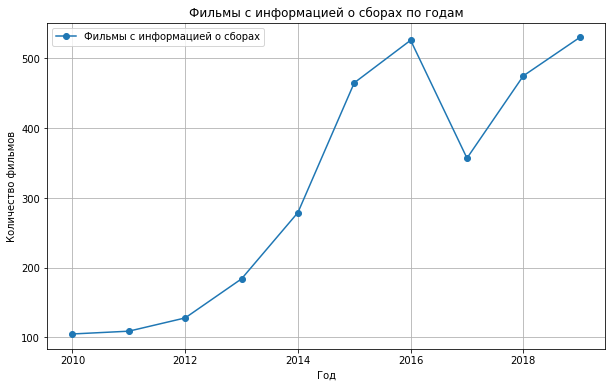

In [72]:
# нарисуем график для визуализации количества фильмов по годам, там где есть информация о сборах
plot_year_data(year_stats, 'Год', 'Фильмы с информацией о сборах', 'Фильмы с информацией о сборах по годам', 'Год', 'Количество фильмов')

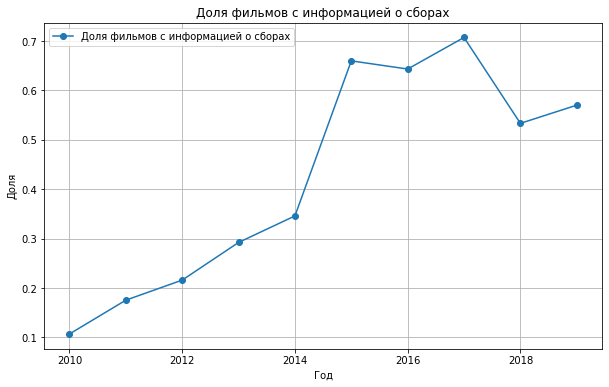

In [73]:
# нарисуем график для визуализации по доле
plot_year_data(year_stats, 'Год', 'Доля фильмов с информацией о сборах', 'Доля фильмов с информацией о сборах', 'Год', 'Доля')

**Вывод**

Нам представленны данные о фильмах с 2010 года по 2019. В период с 2010 по 2016 можем наблюдать быстрый рост как количества фильмов в прокате, так и доли таких фильмов. В 2017 году просадка по количеству фильмов, однако доля в своем максимуме. 

Данные становятся все более полными и качественными с каждым годом, особенно начиная с 2016 года.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

    Год   Сумма сборов
8  2018 49668403134.32
7  2017 48563707217.51
9  2019 48425708779.59
6  2016 47866299741.91
5  2015 39497365196.40
4  2014  7444951859.20
3  2013    29799706.20
1  2011    14102765.00
2  2012     6955423.00
0  2010     2428654.00


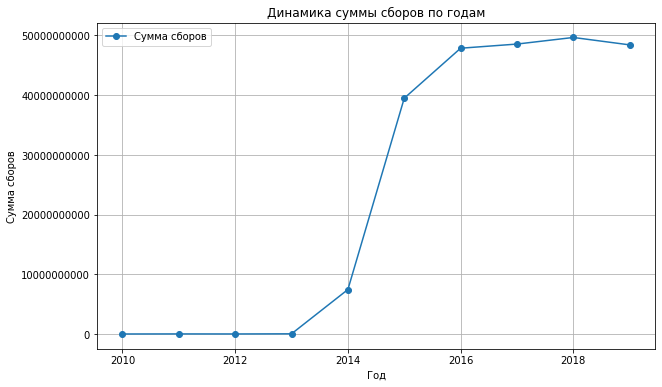

In [74]:
# чтобы изучить динамику проката по годам и определить годы с минимальной и максимальной суммой сборов
# сгруппируем данные по году и вычислим сумму сборов
year_box = data.groupby('year')['box_office'].sum().reset_index()
# переименуем столбцы
year_box = year_box.rename(columns={
    'year': 'Год',
    'box_office': 'Сумма сборов'
})
print(year_box.sort_values(by='Сумма сборов', ascending=False))
# нарисуем график
plot_year_data(year_box, 'Год', 'Сумма сборов', 'Динамика суммы сборов по годам', 'Год', 'Сумма сборов')

**Вывод**

На этих данных мы наблюдаем резкий рост сборов в 2014 и 2015 годах. Либо наполнение данных либо указывает на изменения на ронке кинопроката.

Рост с 2014 года указывает на развитие кинематографического рынка и увеличение интереса к кино (а еще на наполнение данных с 2016 года).

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [75]:
# строим сводную
pivot_year_box = data.groupby('year')['box_office'].agg(
    mean_sum='mean', 
    median_sum='median'
).reset_index()
# переименуем столбцы
pivot_year_box = pivot_year_box.rename(columns={
    'year': 'Год',
    'mean_sum': 'Средняя сумма сборов',
    'median_sum': 'Медианная сумма сборов'
})
pivot_year_box

,Год,Средняя сумма сборов,Медианная сумма сборов
0,2010,23130.04,1700.00
1,2011,129383.17,3000.00
2,2012,54339.24,5660.00
3,2013,161954.92,3522.50
4,2014,26684415.27,18160.00
5,2015,84940570.31,4920933.00
6,2016,91000569.85,3846679.41
7,2017,136032793.33,9968340.00
8,2018,104565059.23,8891102.21
9,2019,91369261.85,4627798.34


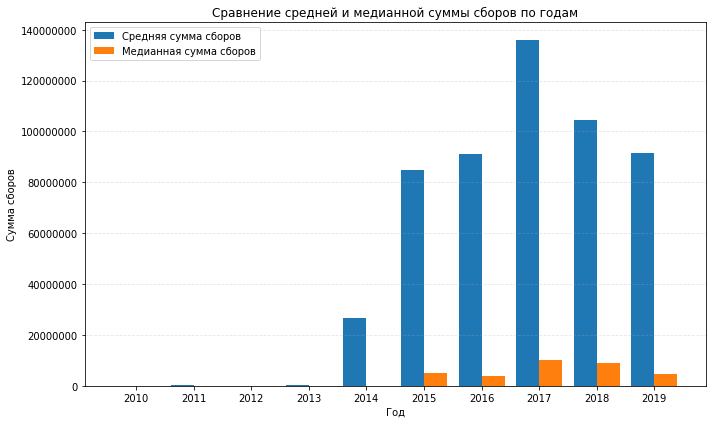

In [76]:
# построим график для наглядности
plt.figure(figsize=(10, 6))
# по средней
plt.bar(
    pivot_year_box['Год'] - 0.2,
    pivot_year_box['Средняя сумма сборов'],
    width=0.4,
    label='Средняя сумма сборов'
)
# по медианной
plt.bar(
    pivot_year_box['Год'] + 0.2,
    pivot_year_box['Медианная сумма сборов'],
    width=0.4,
    label='Медианная сумма сборов'
)

plt.title('Сравнение средней и медианной суммы сборов по годам')
plt.xlabel('Год')
plt.ylabel('Сумма сборов')
plt.xticks(pivot_year_box['Год'])
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

**Вывод**

Разброс значений очень большой, т.к. средняя сильно разнится с медианой.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [77]:
# фильтруем данные
filtr_data_year = data[(data['year'] >= 2015) & (data['year'] <= 2019)]
total_data_year = filtr_data_year.groupby('age_restriction')['box_office'].sum().reset_index()
# переименуем столбцы
total_data_year = total_data_year.rename(columns={
    'age_restriction': 'Возрастная категория',
    'box_office': 'Сумма сборов'
})
total_data_year.sort_values(by='Сумма сборов', ascending=False)

,Возрастная категория,Сумма сборов
3,16,76034733643.63
2,12,60619446628.33
1,6,55798610799.68
4,18,40759615572.12
0,0,809077425.97


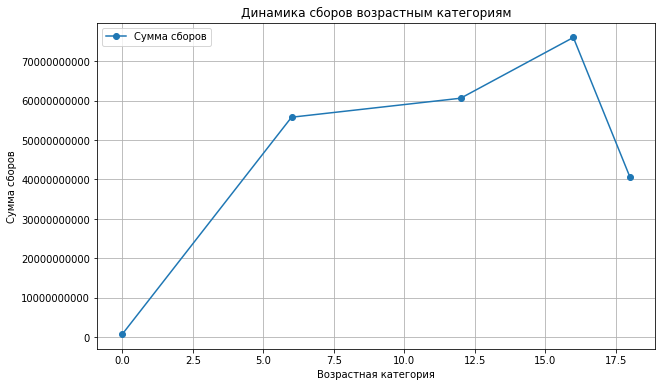

In [78]:
# нарисуем график
total_data_year = total_data_year.sort_values(by='Возрастная категория', ascending=False)
plot_year_data(total_data_year, 'Возрастная категория', 'Сумма сборов', 'Динамика сборов возрастным категориям', 'Возрастная категория', 'Сумма сборов')

Теперь посмотрим как варьировались данные по годам.

In [79]:
# группируем и смотрим сводную
group_year_age = filtr_data_year.groupby(['year', 'age_restriction'])['box_office'].sum().reset_index()
pivot_year_age = group_year_age.pivot(index='year', columns='age_restriction', values='box_office')
pivot_year_age

age_restriction,0,6,12,16,18
year,,,,,
2015,379054578.37,8701799371.41,13616082008.91,11368120870.27,5432308367.44
2016,150228848.67,12053146008.24,12204446524.39,16664548541.74,6793929818.87
2017,229598930.00,12086142145.76,7851427660.67,18745042900.06,9651495581.02
2018,32449002.11,10104974623.41,14267291660.69,16503602346.96,8760085501.15
2019,17746066.82,12852548650.86,12680198773.67,12753418984.60,10121796303.64


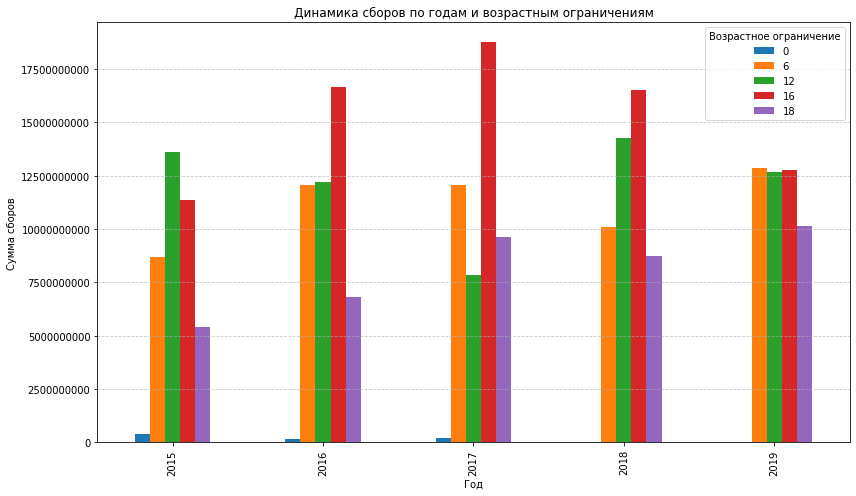

In [80]:
# строим график
pivot_year_age.plot(kind='bar', stacked=False, figsize=(12, 7))
plt.title('Динамика сборов по годам и возрастным ограничениям')
plt.xlabel('Год')
plt.ylabel('Сумма сборов')
plt.legend(title='Возрастное ограничение')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

Да, возрастное ограничение оказывает значительное влияние на сборы фильмов в прокате. Фильмы с возрастными ограничениями 12+ и 16+ собирают значительно больше средств, чем фильмы для младшей аудитории и 18+.

Фильмы с категорией 16+ собрали наибольшую сумму сборов, но если смотреть еще в разрезе года, то собрали больше всего фильмы с возрастными ограничениями 16+ в 2017 году (18 745 042 900.06). Если смотреть в целом за 2015-2019 год, то больше всего собрали фильмы с ограничением 16+ (чуть больше 76 миллиардов).

Это может быть связано с тем, что фильмы 16+:
1. Имеют более широкую зрительскую базу.
2. Обладают большими бюджетами и масштабными маркетинговыми кампаниями.
3. Популярные жанры (например, фэнтези) среди этой категории обычно собирают большие сборы.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [81]:
group_fin = data[data['financing_source'] != 'Нет госфин']
group_fin

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,total_sup,sup_share
1281,пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16,0.00,...,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,2013,А.Атанесян,драма,26500000.00,0.33
1448,бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12,0.00,...,37142857.00,Министерство культуры,NaN,unknown,28140.00,2014,А.Якимчук,unknown,26000000.00,0.70
1498,невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12,0.00,...,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50,2013,Р.Давлетьяров,комедия,107847945.00,0.61
1524,берцы,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16,0.00,...,40574140.00,Министерство культуры,4.20,драма,55917.50,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,28000000.00,0.69
1792,братья ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16,0.00,...,40015122.00,Министерство культуры,6.40,драма,232100.00,2014,М.Угаров,драма,25000000.00,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",12,100000000.00,...,980000000.00,Фонд кино,6.00,"история,биография,драма",717703185.53,2019,А.Кравчук,история,500000000.00,0.51
7466,иван царевич и серый волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",6,100000000.00,...,190000000.00,Фонд кино,6.70,"мультфильм,приключения,семейный",501069235.00,2019,Д.Шмидт,мультфильм,100000000.00,0.53
7474,вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",12,100000000.00,...,944000000.00,Фонд кино,5.70,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,500000000.00,0.53
7476,я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,12,0.00,...,46154000.00,Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,30000000.00,0.65


#### Общий объем господдержки.

In [82]:
total_refundable_support = group_fin['refundable_support'].sum()
total_nonrefundable_support = group_fin['nonrefundable_support'].sum()
total_support = group_fin['total_sup'].sum()
print(f"Общий объем возвратной поддержки: {total_refundable_support}")
print(f"Общий объем невозвратной поддержки: {total_nonrefundable_support}")
print(f"Общий объем государственной поддержки: {total_support}")

Общий объем возвратной поддержки: 3939000000.0
Общий объем невозвратной поддержки: 16261688312.0
Общий объем государственной поддержки: 20200688312.0


In [83]:
group_fin[['refundable_support', 'nonrefundable_support', 'total_sup']].describe()

,refundable_support,nonrefundable_support,total_sup
count,332.00,332.00,332.00
mean,11864457.83,48980988.89,60845446.72
std,24916555.26,59980117.92,72755459.47
min,0.00,0.00,3000000.00
25%,0.00,25000000.00,25333750.00
50%,0.00,30000000.00,35000000.00
75%,15000000.00,40375000.00,60000000.00
max,180000000.00,400000000.00,500000000.00


Всего 332 фильма получили господдержку. Минимум, который получали в поддержку фильмы это 3 миллиона. Зато некоторые фильмы получили 500 миллионов, внушительно.

Медианное значение ниже среднего. Это указывает на то, что распределение средств имеет длинный хвост (несколько фильмов получают значительно больше поддержки, чем остальные).

Интересное наблюдение, медиана объема возвратной поддержки на 0, а у невозвратной около 30 миллионов, значит в основном невозвратная поддерка у фильмов в данных.

**Общий вывод**

Большинство фильмов получают невозвратную поддержку, а возвратная поддержка встречается реже. Некоторые проекты получают очень высокие суммы (до 500 миллионов рублей), что указывает на приоритетность этих фильмов с точки зрения государства. Однако большинство фильмов получает более скромные суммы (медиана около 35 миллионов рублей).

#### Статистика по сборам у фильмов с господдержкой.

In [84]:
group_fin['box_office'].describe()

count          318.00
mean     132432420.05
std      334837856.99
min           1550.00
25%        1236675.50
50%       15720067.71
75%      106373008.27
max     3073568690.79
Name: box_office, dtype: float64

**Вывод**

Данные есть только по 318 фильмам, не у всех указан сбор. Медианное значение значительно ниже среднего. Минимальный сбор всего 1550 рублей указывает на то, что некоторые фильмы практически не окупились или имели крайне ограниченный успех. Зато максимальный сбор около 3 миллиардов рублей, есть успешный проект.

Если сравнивать медианные значения (а смотрим мы их, т.к. разброс большой), то можно сказать что фильмы с господдержкой в основном не окупаются при полученных 35 миллионах поддержки (медиана общей поддержки), только 15,7 миллиона (медианное значение) общий сбор.

#### Рейтинги фильмов

Возможно, фильмы с высокими рейтингами лучше окупаются.

In [85]:
group_fin['ratings'].describe()

count   316.00
mean      6.02
std       1.15
min       1.00
25%       5.30
50%       6.20
75%       6.70
max       9.40
Name: ratings, dtype: float64

**Вывод**

- Минимальный рейтинг: 1 — это очень низкий результат.
- Максимальный рейтинг: 9,4 — высокий результат, указывающий на успешный фильм с положительной критикой и отзывами.
- Средний рейтинг: 6,02 - не очень впечатляет.
- Медианный рейтиг: 6,2 - тоже не очень впечатляет. Можно сказать, что половина фильмов получивших поддержку не очень нравятся зрителям (на это также указывает 75% квартиль - 6,7). Но это достаточно удовлетворительно.

Максимальный рейтинг показывает, что фильмы с господдержкой могут быть высокооценены. А фильмы с низким рейтингом могут показать нам проблемы, может жанр или сценарий, а может и еще что-то что не понравилось зрителям и критикам.

#### Жанры фильмов

Посмотрим, какие жанры чаще всего получают поддержку.

In [86]:
group_fin['main_genre'].value_counts()

драма          93
комедия        74
мультфильм     31
unknown        16
триллер        15
мелодрама      15
фэнтези        11
фантастика     11
ужасы          10
военный         9
семейный        7
приключения     7
боевик          6
детектив        5
детский         4
мюзикл          4
история         4
криминал        3
спорт           3
биография       3
реальное ТВ     1
Name: main_genre, dtype: int64

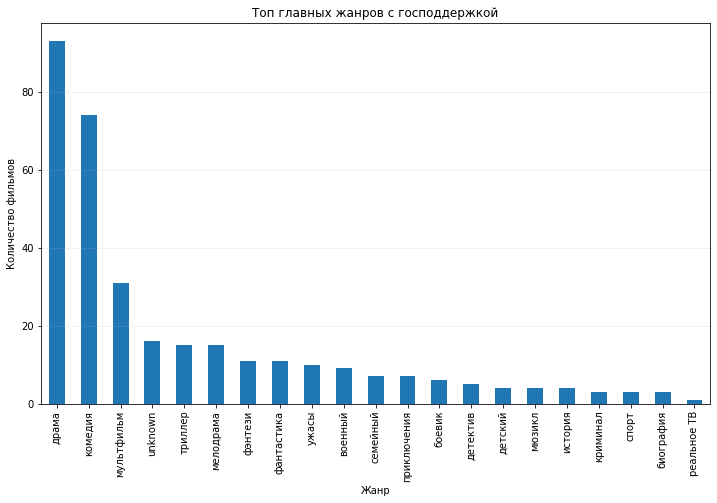

In [87]:
# нарисуем график для наглядности
group_fin['main_genre'].value_counts().plot(kind='bar', figsize=(12, 7))
plt.title('Топ главных жанров с господдержкой')
plt.xlabel('Жанр')
plt.ylabel('Количество фильмов')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

Явные 2 лидера получаемые поддержку это драма и комедия. Мультфильмы получают 3 место, скорее всего это показывает важность развития семейного кино и детских проектов, но сильно отстают в сравнении с лидерами. Остальные получают значительно меньше поддержки, а может таких фильмов мало снимают.

#### Типы фильмов

In [88]:
group_fin['type'].value_counts()

Художественный    300
Анимационный       31
Документальный      1
Name: type, dtype: int64

Ожидаемо, самую большую поддержку получают художественные фильмы.

#### Окупаемость

Нашла рассчеты окупаемости (Return on Investment, ROI). Попробуем вывести:
- Если ROI > 1: фильм окупился.
- Если ROI = 1 : Фильм полностью покрыл затраты
- Если ROI < 1: фильм не окупился.

In [89]:
group_fin = group_fin.copy()
group_fin.loc[:, 'roi'] = group_fin['box_office'] / group_fin['budget']

In [90]:
group_fin['roi'] = group_fin['roi'].replace([np.inf, -np.inf], np.nan)
group_fin.sort_values(by='roi', ascending=False).head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year,main_director,main_genre,total_sup,sup_share,roi
7456,холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",12,25000000.00,...,Фонд кино,6.80,комедия,3073568690.79,2019,К.Шипенко,комедия,60000000.00,0.38,19.21
5708,лёд,111000518,2018-02-01 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",12,25000000.00,...,Фонд кино,NaN,unknown,1445731797.89,2018,О.Трофим,unknown,85000000.00,0.57,9.73
5749,я худею,111001618,2018-03-07 12:00:00+00:00,Художественный,"ООО ""Друг Друга"", ООО ""Ди Пи Джи""",Россия,А.Черномазов (псевдоним Алексей Нужный),"С.Корнихин, Н.Куликов, А.Черномазов, А.Кремер,...",16,0.00,...,Министерство культуры,6.90,комедия,633462266.74,2018,А.Черномазов (псевдоним Алексей Нужный),комедия,30000000.00,0.34,7.23
3229,"гуляй, вася !",111018216,2016-12-20 12:00:00+00:00,Художественный,"ООО Кинокомпания ""Инвада Фильм"", АО ""ВБД Груп""",Россия,Р.Каримов,"А.Новиков, А.Котелевский, Э.Илоян, Д.Жалинский...",16,0.00,...,Министерство культуры,6.50,комедия,259099078.00,2016,Р.Каримов,комедия,25345000.00,0.65,6.64
2701,самый лучший день,111017815,2015-10-14 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,А.Першин (псевдоним Ж.Крыжовников),"Т.Бекмамбетов, А.Першин (псевдоним Ж.Крыжовник...",16,29000000.00,...,Фонд кино,4.70,"комедия,музыка",683029061.40,2015,А.Першин (псевдоним Ж.Крыжовников),комедия,63000000.00,0.48,5.23
2205,8 новых свиданий,111014914,2014-10-30 12:00:00+00:00,Художественный,"ООО ""Смарт ТВ Продакшн""",Россия,М.Бальчюнас,"ООО ""Грин Филмс"", ООО ""ПЦ ""Горад""",12,0.00,...,Фонд кино,6.00,комедия,393344626.30,2014,М.Бальчюнас,комедия,30000000.00,0.39,5.08
5641,ёлки новые,111011617,2017-12-21 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,"Д.Киселев, А.Першин (Ж.Крыжовников), А.Карпило...","Т.Бекмамбетов, Г.Стрижевская",6,50000000.00,...,Фонд кино,5.80,"комедия,мелодрама",855451052.00,2017,Д.Киселев,комедия,100000000.00,0.57,4.91
6178,непрощенный,111016018,2018-09-27 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Большое кино""",Россия,С.Андреасян,"С.Андреасян, Г.Андреасян, А.Ананикян",16,0.00,...,Министерство культуры,6.70,драма,393279629.43,2018,С.Андреасян,драма,40000000.00,0.48,4.77
5653,движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",6,0.00,...,Фонд кино,7.50,"спорт,драма",2779686144.00,2017,А.Мегердичев,спорт,400000000.00,0.68,4.71
5505,последний богатырь,111007017,2017-10-19 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",12,50000000.00,...,Фонд кино,6.80,"комедия,фэнтези,приключения",1655037688.00,2017,Д.Дьяченко,комедия,100000000.00,0.28,4.70


In [91]:
group_fin['roi'].describe()

count   301.00
mean      0.76
std       1.67
min       0.00
25%       0.02
50%       0.15
75%       0.78
max      19.21
Name: roi, dtype: float64

**Вывод**

В среднем фильмы возвращают 76% своего бюджета, по медиане и того 15%. А 75% фильмов имеют только 0,78, что ниже едины, значит что фильмы не выгодны, а фонд кино или мин.культуры теряют вложения.

По данным самый окупаемый фильм "Холоп" (19.21, при господдержке в 38% от бюджета), что сильно выбивается из рейтинга (следубщая позиция "Лед" с окупаемостью 9.73). Еще примечательно что в топ-10 по окупаемости в основном входят комедии.

#### Общее или топ фильмов с высоким рейтингом из топовых жанров отсортированные по окупаемости

Отфильтруем фильмы по топовым жанрам (драма и комедия), с рейтингом выше 75% значений (6.7). В итоге выведем строки по убыванию окупаемости.

In [92]:
filtered_films = group_fin[
    ((group_fin['main_genre'] == 'драма') | (group_fin['main_genre'] == 'комедия')) &
    (group_fin['ratings'] > 6.7)
]
filtered_films.sort_values(by='roi', ascending=False).head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year,main_director,main_genre,total_sup,sup_share,roi
7456,холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",12,25000000.00,...,Фонд кино,6.80,комедия,3073568690.79,2019,К.Шипенко,комедия,60000000.00,0.38,19.21
5749,я худею,111001618,2018-03-07 12:00:00+00:00,Художественный,"ООО ""Друг Друга"", ООО ""Ди Пи Джи""",Россия,А.Черномазов (псевдоним Алексей Нужный),"С.Корнихин, Н.Куликов, А.Черномазов, А.Кремер,...",16,0.00,...,Министерство культуры,6.90,комедия,633462266.74,2018,А.Черномазов (псевдоним Алексей Нужный),комедия,30000000.00,0.34,7.23
5505,последний богатырь,111007017,2017-10-19 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",12,50000000.00,...,Фонд кино,6.80,"комедия,фэнтези,приключения",1655037688.00,2017,Д.Дьяченко,комедия,100000000.00,0.28,4.70
6509,ёлки последние,111023918,2018-12-10 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,"Т.Бекмамбетов, А.Першин (псевдоним Ж.Крыжовник...","Т.Бекмамбетов, Г.Стрижевская",6,75000000.00,...,Фонд кино,6.90,комедия,701507030.27,2018,Т.Бекмамбетов,комедия,100000000.00,0.56,3.90
2686,без границ,111010315,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Небо""",Россия,"Р.Гигинеишвили, К.Оганисян, Р.Прыгунов","Э.Илоян, Э.Родоная, Р.Гигинеишвили, Д.Жалинский",12,10000000.00,...,Фонд кино,6.80,"комедия,мелодрама",190953419.40,2015,Р.Гигинеишвили,комедия,50000000.00,0.62,2.38
2920,экипаж,111005416,2016-03-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",6,50000000.00,...,Фонд кино,7.60,"драма,триллер,приключения",1402255390.00,2016,Н.Лебедев,драма,442104482.00,0.70,2.21
5826,тренер,111003218,2018-04-19 12:00:00+00:00,Художественный,"ООО ""ДК интертеймент"", ООО ""Киностудия ""Слово""...",Россия,Д.Козловский,"Д.Козловский, П.Ануров, Л.Верещагин, А.Златопо...",12,0.00,...,Фонд кино,6.80,"драма,спорт",820528005.21,2018,Д.Козловский,драма,260000000.00,0.67,2.10
6855,миллиард,111006719,2019-04-17 12:00:00+00:00,Художественный,"ООО ""Медиа Юниверсал Ивент""",Россия,Р.Прыгунов,"В.Маслов, В.Верещагин, Б.Анисимов",12,0.00,...,Фонд кино,8.20,драма,408646665.70,2019,Р.Прыгунов,драма,140000000.00,0.58,1.70
5502,салют-7,111006917,2017-10-01 12:00:00+00:00,Художественный,"ООО ""Лемон Филмз Студио""",Россия,К.Шипенко,"С.Сельянов, Б.Бакурадзе, А.Златопольский",12,0.00,...,Фонд кино,7.40,"драма,приключения,триллер",752679777.00,2017,К.Шипенко,драма,225000000.00,0.46,1.52
1870,а зори здесь тихие,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,unknown,12,50000000.00,...,Фонд кино,8.50,"драма,военный,история",249166767.70,2015,Р.Давлетьяров,драма,150000000.00,0.68,1.13


### Шаг 5. Напишите общий вывод

#### Объединение файлов

Были объеденены 2 таблицы mkrf_movies (реестра прокатных удостоверений) и mkrf_shows (информайция о показах фильмов в российских кинотеатрах).


#### Предобработка данных

##### Типы данных

0. title                  object 
1. puNumber               int64  
2. show_start_date        object 
3. type                   object 
4. film_studio            object 
5. production_country     object 
6. director               object 
7. producer               object 
8. age_restriction        object 
9. refundable_support     float64
10. nonrefundable_support float64
11. budget                float64
12. financing_source      object 
13. ratings               object 
14. genres                object 
15. box_office            float64

Были изменены данные в столбцах show_start_date, ratings (рейтинг привели в общий формат числа, т.к. были значения указанные в %). Остальные не нужно.

##### Пропуски

title                       0

puNumber                    0

show_start_date             0

type                        0

film_studio                18

production_country          2

director                    9

producer                  568

age_restriction             0

refundable_support       7154

nonrefundable_support    7154

budget                   7154

financing_source         7154

ratings                   967

genres                    976

box_office               4328

1. film_studio (студия-производитель), director (режиссер), producer (продюсер), genres (жанры) были заполнены значениями "unknown".
2. production_country (страна-производитель) пропусков всего 2, заполнено значением "Россия".
3. Столбцы refundable_support (объём возвратных средств государственной поддержки), nonrefundable_support (объём невозвратных средств государственной поддержки), financing_source (источник государственного финансирования) не заполнены у тех фильмов, которые не финансировались. Поэтому заполнили их соответственно: у столбцов с объёмами заполним 0, а у источника проставим "Нет госфин" (нет государственного финансирования).

**Итог**

title                       0

puNumber                    0

show_start_date             0

type                        0

film_studio                 0

production_country          0

director                    0

producer                    0

age_restriction             0

refundable_support          0

nonrefundable_support       0

budget                   7154

financing_source            0

ratings                   967

genres                      0

box_office               4328

##### Дубликаты

1. Замечены _ в конце названия, например, "Аватар_", пробелы лишние "6 дней ", лишние точки в конце "13.", разные регистры 'Атлантида: Затерянный мир' и 'Атлантида: затерянный мир'.
2. Столбец puNumber. Были дубли номеров, оставили первое вхождение.
3. Столбцы type и film_studio - лишние пробелы. Лишние пробелы в названиях.
4. production_country - ошибки в названиях, лишние пробелы. И заменено странное значение 2019 на Германию (всего 1 такая строка).
5. director. Тут тоже пробелы лишние, скорее всего где-то имя сокращено, где-то полное, но так как будем создавать столбец только с первым автором, то оставили эту обработку но попозже (когда вынесем столбец с главным режессером). Спойлер, не обнаружено дубликатов.
6. age_restriction. Убрала описание текстом и оставила только значения.
7. genres. Лишние и недостающие значения, выносили в отдельный столбец, оставила обработку на тот момент (спойлер, не обнаружено дубликатов).

##### Количественные данные

Были исследованы оставшиеся данные.

Обнаружили, что если столбец с общим бюджетом фильма пустой, то столбцы с объемом гос. поддержки (возратной или не возвратной) тоже пустой. А при указанном бюджете один из столбцов с поддержкой заполнен и не содержит 0.

Могу сделать вывод, что эти данные прописывают только если есть информация об общем бюджете фильма, поэтому при исследовании данных про объемы и общему бюджету используем фильтрацию.

##### Добавление столбцов

1. Создан столбец с информацией о годе проката. Выделен год из даты премьеры фильма.
2. Созданы два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы вошли первые значения из списка режиссёров и жанров соответственно.
3. Посчитали в отдельном столбце, какую долю от общего бюджета фильма составляет государственная поддержка.

Интересность: самая большая доля аж 78%.

#### Исследовательский анализ данных

##### 1. Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

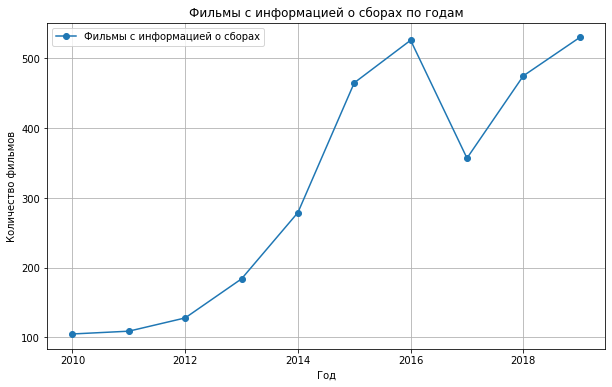 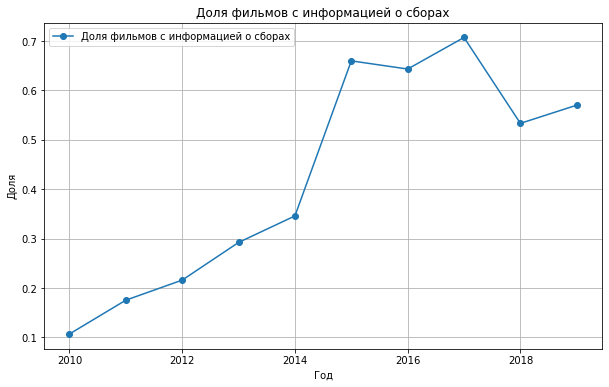

**Вывод**

Нам представленны данные о фильмах с 2010 года по 2019. В период с 2010 по 2016 можем наблюдать быстрый рост как количества фильмов в прокате, так и доли таких фильмов. В 2017 году просадка по количеству фильмов, однако доля в своем максимуме.

Данные становятся все более полными и качественными с каждым годом, особенно начиная с 2016 года.

##### 2. Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

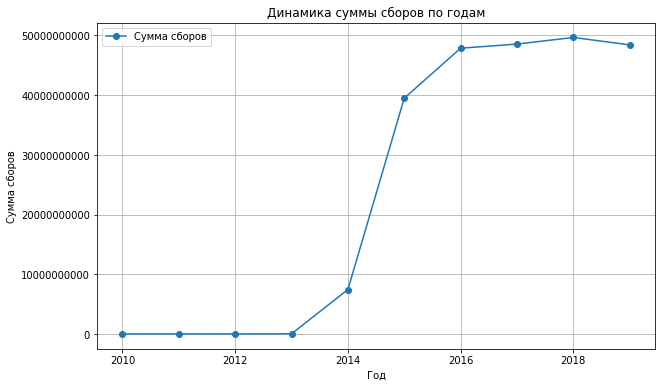

**Вывод**

На этих данных мы наблюдаем резкий рост сборов в 2014 и 2015 годах. Либо наполнение данных либо указывает на изменения на ронке кинопроката.

Рост с 2014 года указывает на развитие кинематографического рынка и увеличение интереса к кино (а еще на наполнение данных с 2016 года).

##### 3. С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

| Год  | Средняя сумма сборов   | Медианная сумма сборов |
|------|------------------------|------------------------|
| 2010 | 23130.04              | 1700.00               |
| 2011 | 129383.17             | 3000.00               |
| 2012 | 54339.24              | 5660.00               |
| 2013 | 161954.92             | 3522.50               |
| 2014 | 26684415.27           | 18160.00              |
| 2015 | 84940570.31           | 4920933.00            |
| 2016 | 91000569.85           | 3846679.41            |
| 2017 | 136032793.33          | 9968340.00            |
| 2018 | 104565059.23          | 8891102.21            |
| 2019 | 91369261.85           | 4627798.34            |

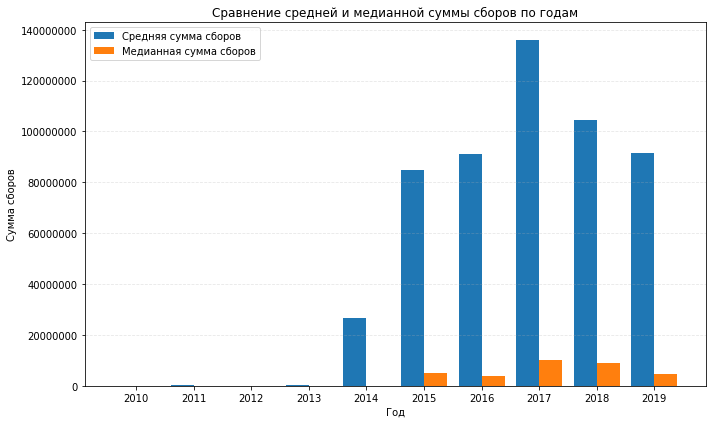

**Вывод**

Разброс значений очень большой, т.к. средняя сильно разнится с медианой.

##### 4. Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

| Возрастная категория | Сумма сборов        |
|----------------------|--------------------|
| 3 (16+)             | 76034733643.63     |
| 2 (12+)             | 60619446628.33     |
| 1 (6+)              | 55798610799.68     |
| 4 (18+)             | 40759615572.12     |
| 0 (0+)              | 809077425.97       |

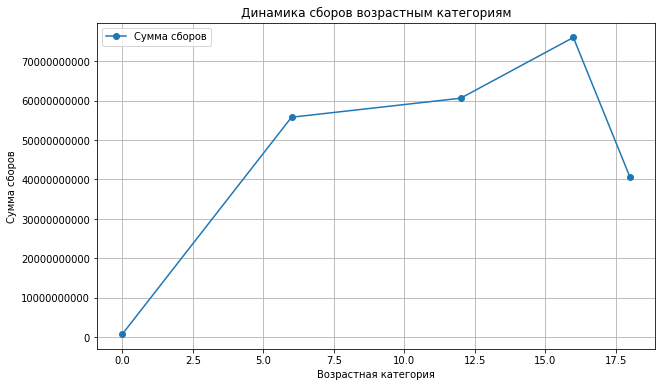

| Год \ Возрастное ограничение | 0+          | 6+           | 12+          | 16+          | 18+          |
|-----------------------------|-------------|--------------|--------------|--------------|--------------|
| 2015                        | 379054578.37| 8701799371.41| 13616082008.91| 11368120870.27| 5432308367.44|
| 2016                        | 150228848.67| 12053146008.24| 12204446524.39| 16664548541.74| 6793929818.87|
| 2017                        | 229598930.00| 12086142145.76| 7851427660.67 | 18745042900.06| 9651495581.02|
| 2018                        | 32449002.11 | 10104974623.41| 14267291660.69| 16503602346.96| 8760085501.15|
| 2019                        | 17746066.82 | 12852548650.86| 12680198773.67| 12753418984.60| 10121796303.64|

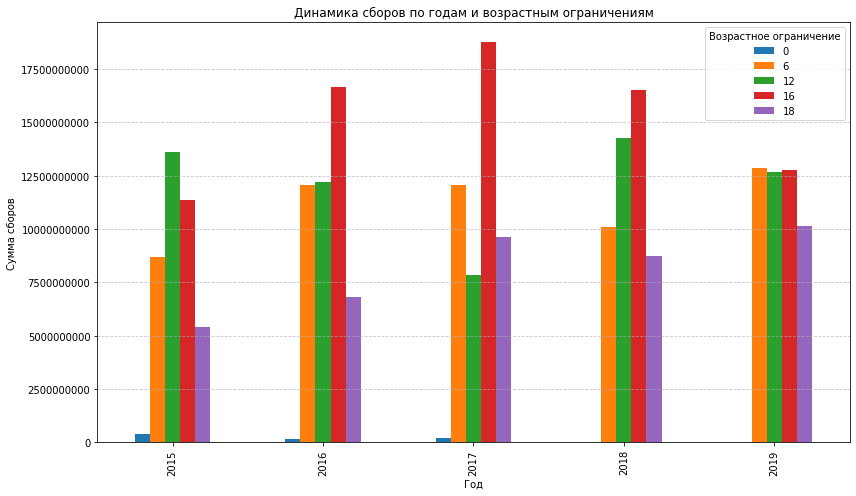

**Вывод**

Да, возрастное ограничение оказывает значительное влияние на сборы фильмов в прокате. Фильмы с возрастными ограничениями 12+ и 16+ собирают значительно больше средств, чем фильмы для младшей аудитории и 18+.

Фильмы с категорией 16+ собрали наибольшую сумму сборов, но если смотреть еще в разрезе года, то собрали больше всего фильмы с возрастными ограничениями 16+ в 2017 году (18 745 042 900.06). Если смотреть в целом за 2015-2019 год, то больше всего собрали фильмы с ограничением 16+ (чуть больше 76 миллиардов).

Это может быть связано с тем, что фильмы 16+:
- Имеют более широкую зрительскую базу.
- Обладают большими бюджетами и масштабными маркетинговыми кампаниями.
- Популярные жанры (например, фэнтези) среди этой категории обычно собирают большие сборы.

#### Исследуйте фильмы, которые получили государственную поддержку

##### 1. Общий объем господдержки

| Статистика           | Возвратная поддержка (refundable_support) | Невозвратная поддержка (nonrefundable_support) | Общая поддержка (total_sup) |
|----------------------|-------------------------------------------|-----------------------------------------------|-----------------------------|
| Количество фильмов   | 332.00                                    | 332.00                                        | 332.00                      |
| Среднее значение     | 11,864,457.83                             | 48,980,988.89                                 | 60,845,446.72               |
| Стандартное отклонение | 24,916,555.26                            | 59,980,117.92                                 | 72,755,459.47               |
| Минимум              | 0.00                                      | 0.00                                          | 3,000,000.00                |
| 25%-й квартиль       | 0.00                                      | 25,000,000.00                                 | 25,333,750.00               |
| Медиана (50%)        | 0.00                                      | 30,000,000.00                                 | 35,000,000.00               |
| 75%-й квартиль       | 15,000,000.00                            | 40,375,000.00                                 | 60,000,000.00               |
| Максимум             | 180,000,000.00                           | 400,000,000.00                                | 500,000,000.00              |

Всего 332 фильма получили господдержку. Минимум, который получали в поддержку фильмы это 3 миллиона. Зато некоторые фильмы получили 500 миллионов, внушительно.

Медианное значение ниже среднего. Это указывает на то, что распределение средств имеет длинный хвост (несколько фильмов получают значительно больше поддержки, чем остальные).

Интересное наблюдение, медиана объема возвратной поддержки на 0, а у невозвратной около 30 миллионов, значит в основном невозвратная поддерка у фильмов в данных.

**Общий вывод**

Большинство фильмов получают невозвратную поддержку, а возвратная поддержка встречается реже. Некоторые проекты получают очень высокие суммы (до 500 миллионов рублей), что указывает на приоритетность этих фильмов с точки зрения государства. Однако большинство фильмов получает более скромные суммы (медиана около 35 миллионов рублей).

##### 2. Статистика по сборам у фильмов с господдержкой

| Статистика   | Значение       |
|--------------|----------------|
| count        | 318.00         |
| mean         | 132432420.05   |
| std          | 334837856.99   |
| min          | 1550.00        |
| 25%          | 1236675.50     |
| 50%          | 15720067.71    |
| 75%          | 106373008.27   |
| max          | 3073568690.79  |

**Вывод**

Данные есть только по 318 фильмам, не у всех указан сбор. Медианное значение значительно ниже среднего. Минимальный сбор всего 1550 рублей указывает на то, что некоторые фильмы практически не окупились или имели крайне ограниченный успех. Зато максимальный сбор около 3 миллиардов рублей, есть успешный проект.

Если сравнивать медианные значения (а смотрим мы их, т.к. разброс большой), то можно сказать что фильмы с господдержкой в основном не окупаются при полученных 35 миллионах поддержки (медиана общей поддержки), только 15,7 миллиона (медианное значение) общий сбор.

##### 3. Рейтинги фильмов

**Вывод**

Минимальный рейтинг: 1 — это очень низкий результат.

Максимальный рейтинг: 9,4 — высокий результат, указывающий на успешный фильм с положительной критикой и отзывами.

Средний рейтинг: 6,02 - не очень впечатляет.

Медианный рейтиг: 6,2 - тоже не очень впечатляет. Можно сказать, что половина фильмов получивших поддержку не очень нравятся зрителям (на это также указывает 75% квартиль - 6,7). Но это достаточно удовлетворительно.

Максимальный рейтинг показывает, что фильмы с господдержкой могут быть высокооценены. А фильмы с низким рейтингом могут показать нам проблемы, может жанр или сценарий, а может и еще что-то что не понравилось зрителям и критикам.

##### 4. Жанры фильмов

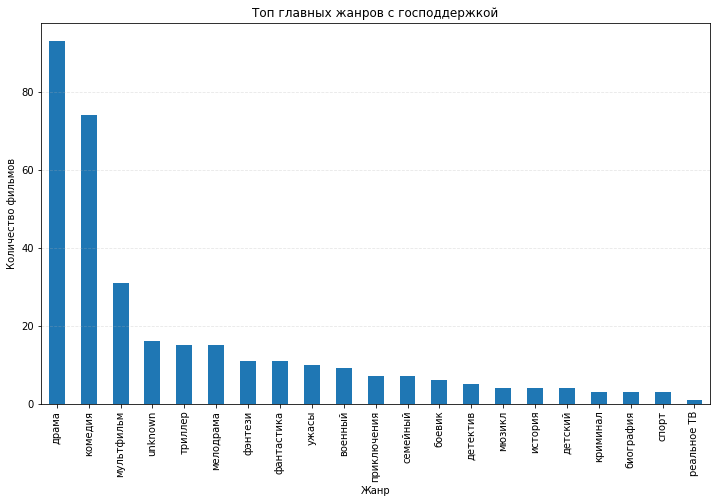

**Вывод**

Явные 2 лидера получаемые поддержку это драма и комедия. Мультфильмы получают 3 место, скорее всего это показывает важность развития семейного кино и детских проектов, но сильно отстают в сравнении с лидерами. Остальные получают значительно меньше поддержки, а может таких фильмов мало снимают.

##### 5. Типы фильмов

Художественный    300

Анимационный       31

Документальный      1

Ожидаемо, самую большую поддержку получают художественные фильмы.

##### 6. Окупаемость

Нашла рассчеты окупаемости (Return on Investment, ROI). Попробуем вывести:
- Если ROI > 1: фильм окупился.
- Если ROI = 1 : Фильм полностью покрыл затраты
- Если ROI < 1: фильм не окупился.

**Вывод**

В среднем фильмы возвращают 76% своего бюджета, по медиане и того 15%. А 75% фильмов имеют только 0,78, что ниже едины, значит что фильмы не выгодны, а фонд кино или мин.культуры теряют вложения.

По данным самый окупаемый фильм "Холоп" (19.21, при господдержке в 38% от бюджета), что сильно выбивается из рейтинга (следубщая позиция "Лед" с окупаемостью 9.73). Еще примечательно что в топ-10 по окупаемости в основном входят комедии.

##### 7. Общее или топ фильмов с высоким рейтингом из топовых жанров отсортированные по окупаемости

Отфильтруем фильмы по топовым жанрам (драма и комедия), с рейтингом выше 75% значений (6.7). В итоге выведем строки по убыванию окупаемости.

Вот топ 10 фильмов:
1. Холоп
2. Я худею
3. Последний богатырь
4. Ёлки последние
5. Без границ
5. Экипаж
6. Тренер
7. Миллиард
8. Салют-7
9. А зори здесь тихие

##### 8. Итог

Государственная поддержка кино играет важную роль, но её эффективность пока оставляет желать лучшего. Большинство фильмов не окупаются, а средний рейтинг не впечатляет.

Рекомендации:

Повысить качество и окупаемость фильмов, для этого нужно сосредоточиться на анализе успешных проектов, поддержке новых жанров и улучшении стратегии финансирования.
